## Data Preparation German
output: dataframe with catagories, speaker_id and data_path

In [1]:
# dependecies
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
# Define the dataset directory
emodb_path = r"..\Data\German\wav"


# Mapping EmoDB filename encoding to emotions 
emotion_map = {
    'W': 'anger',
    'L': 'boredom',
    'E': 'disgust',
    'A': 'fear',
    'F': 'happiness',
    'T': 'sadness',
    'N': 'neutral'
}

# Extract emotion labels from filenames
filenames = glob.glob(os.path.join(emodb_path, "*.wav"))
emotion = [emotion_map[os.path.basename(f)[5]] for f in filenames if len(os.path.basename(f)) > 5 and os.path.basename(f)[5] in emotion_map]
speaker_id = [os.path.basename(f)[0:2] for f in filenames]

In [3]:
# Create a DataFrame
df = pd.DataFrame({
    'filename': filenames,
    'emotion': emotion,
    'speaker_id': speaker_id
})
df.head()

,filename,emotion,speaker_id
0,..\Data\German\wav\03a01Fa.wav,happiness,03
1,..\Data\German\wav\03a01Nc.wav,neutral,03
2,..\Data\German\wav\03a01Wa.wav,anger,03
3,..\Data\German\wav\03a02Fc.wav,happiness,03
4,..\Data\German\wav\03a02Nc.wav,neutral,03


In [4]:
# counts of speakers
df["speaker_id"].nunique()

10

In [5]:
# speaker distribution
speaker_distribution = df["speaker_id"].value_counts()
speaker_distribution


speaker_id
16    71
14    69
13    61
08    58
15    56
11    55
03    49
09    43
10    38
12    35
Name: count, dtype: int64

We have 10 speakers and the speaker distribution looks good as they all have a similar amount of audio files.

In [6]:
# Count occurrences of each emotion
emotion_counts = df['emotion'].value_counts()
emotion_counts

emotion
anger        127
boredom       81
neutral       79
happiness     71
fear          69
sadness       62
disgust       46
Name: count, dtype: int64

C:\Users\david\AppData\Local\Temp\ipykernel_26544\19157682.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=emotion_counts.index, y=emotion_counts.values, palette="viridis")


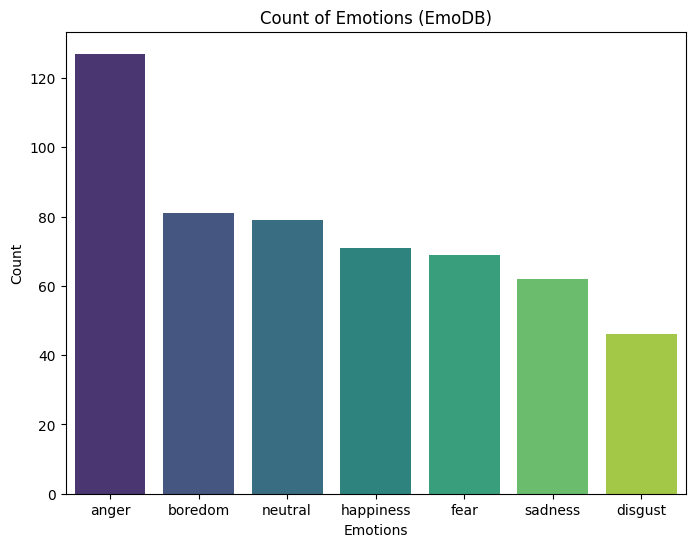

In [7]:
# plot distribution of emotions
plt.figure(figsize=(8, 6))
sns.barplot(x=emotion_counts.index, y=emotion_counts.values, palette="viridis")
plt.xlabel("Emotions")
plt.ylabel("Count")
plt.title("Count of Emotions (EmoDB)")
plt.show()

In [ ]:
# Encoding labels to 0 and 1
# Mapping dictionary
# positive: 1
# negative: 0
emotion_map = {
    'happiness': 1,
    'neutral': 1,
    'sadness': 0,
    'anger': 0,
    'disgust': 0,
    'fear': 0,
    'boredom': 0
}

# Map emotions to Positive/Negative
df['valence'] = df['emotion'].map(emotion_map)

In [9]:
# save the data as csv
df.to_csv("../Data/German/data_path_german.csv",index=False)
df.head()

,filename,emotion,speaker_id,valence
0,..\Data\German\wav\03a01Fa.wav,happiness,03,1
1,..\Data\German\wav\03a01Nc.wav,neutral,03,1
2,..\Data\German\wav\03a01Wa.wav,anger,03,0
3,..\Data\German\wav\03a02Fc.wav,happiness,03,1
4,..\Data\German\wav\03a02Nc.wav,neutral,03,1
